![Image Description](./images/RectangularVsNonRectangular.png)


# Environment Setup
---

- Start by creating a Virtual Environment for your project

Before running any code in this notebook, it's important to set up a clean Python environment to manage dependencies. We recommend using a **VENV-type virtual environment** in **Visual Studio Code (VSC)**. Follow these steps:

### ✅ Steps to Create a Virtual Environment in VSC

1. **Open your project folder** in Visual Studio Code.

2. **Open the terminal**:
   - Go to `View` > `Terminal` or press `Ctrl + `` (backtick).

3. **Create the virtual environment** by running:
   ```bash
   python -m venv venv
   ```

4. Once the environment is created, you need to **activate it** so that all Python packages you install are scoped to this project only.
    On Windows:
    ```bash
    .\venv\Scripts\activate
    ```

    On macOS/Linux
    ```bash
    source venv/bin/activate
    ```

5. ⚠️ Why Activation Matters
Activating the virtual environment ensures that:

- All package installations using pip are local to your project.
- You avoid modifying the global Python environment, which could affect other projects or system tools.
- Your project remains portable and reproducible, especially when sharing with others or deploying.

### 📦 Installing Required Libraries
Once activated, install the required libraries using:

In [14]:
%pip install matplotlib pandas seaborn
%pip install requests sympy ipython

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Non-Rectangular Data Structures
---

- Data that does not fit into a traditional table format.
- Examples include JSON, XML, hierarchical, and graph data structures.

## API Resources

* Public APIs for Free (GitHub): https://github.com/public-apis/public-apis
* Public APIs for Developers (RapidAPI): https://rapidapi.com/collection/list-of-free-apis
* Free and Open Public APIs: https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/


### Fetching JSON Data from an API Endpoint (Example 1)

In this example, we will fetch JSON content from a free API endpoint using the `requests` library in Python. The API endpoint we are using is from JSONPlaceholder, which provides a simple REST API for testing and prototyping.

1. **Import the `requests` library**: This library allows us to send HTTP requests in Python.
2. **Define the API endpoint**: We specify the URL of the API endpoint we want to fetch data from.
3. **Send a GET request**: We use the `requests.get()` method to send a GET request to the API endpoint.
4. **Check if the request was successful**: We check the status code of the response to ensure the request was successful (status code 200).
5. **Parse the JSON content**: If the request was successful, we use the `.json()` method to parse the JSON content of the response.
6. **Display the JSON content**: Finally, we print the JSON content to the console.


In [ ]:
import requests

# Define the API endpoint
url = "https://jsonplaceholder.typicode.com/posts/1"

# Send a GET request to the API endpoint
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON content
    data = response.json()
    # Display the JSON content
    print(data)
else:
    print(f"Failed to retrieve data: {response.status_code}")


{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


### Fetching JSON Data from an API Endpoint (Example 2)

In this example, we will fetch JSON content from a free API endpoint using the `requests` library in Python. The API endpoint we are using is from the Dog CEO's Dog API, which provides random pictures of dogs.


In [ ]:
"""
David Espinosa
PROG8431 
Fall 2024
Rectangular Data Structures

Fetches a random dog image from the Dog CEO's Dog API.
"""
import requests

def fetch_random_dog_image():
    # URL of the JSON file from the Dog CEO's Dog API
    url = 'https://dog.ceo/api/breeds/image/random'

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON content
        data = response.json()
        print(data)
    else:
        print(f"Failed to retrieve data: {response.status_code}")

# Call the function
fetch_random_dog_image()


{'message': 'https://images.dog.ceo/breeds/havanese/00100trPORTRAIT_00100_BURST20191030212452971_COVER.jpg', 'status': 'success'}


### Fetching JSON Data from an API Endpoint (Example 3)

In this example, we will fetch JSON content from a free API endpoint using the `requests` library in Python. The API endpoint we are using is from the Represent API by Open North, which provides information about political representatives in Canada. This API is listed here:
* https://github.com/public-apis/public-apis?tab=readme-ov-file

In [ ]:
import requests

# Define the API endpoint
url = "https://represent.opennorth.ca/representatives/house-of-commons/"

# Define the headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the API endpoint with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON content
    data = response.json()
    # Display the JSON content
    print(data)
else:
    print(f"Failed to retrieve data: {response.status_code}")


### Fetching JSON Data from an API Endpoint (Example 4)

In this example, we will fetch JSON content from a free API endpoint using the `requests` library in Python. The API endpoint we are using is from the Imgflip API, which provides a list of popular memes. This API is listed here: 
* https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/

In [ ]:
import requests

# Define the API endpoint
url = "https://api.imgflip.com/get_memes"

# Send a GET request to the API endpoint
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON content
    data = response.json()
    # Display the JSON content
    print(data)
else:
    print(f"Failed to retrieve data: {response.status_code}")


<img src="https://i.imgflip.com/1otk96.jpg" width="400" height="400">

### Challenge
Running this API is not trivial, but offers many services, and it is federally funded (i.e. free):

* https://api.weather.gc.ca/?lang=en
* https://api.weather.gc.ca/openapi#/climate-hourly/getClimate-hourlyFeatures
* https://eccc-msc.github.io/open-data/usage/use-case_arthur/use-case_arthur_en/

In [ ]:
import requests
from datetime import datetime, timedelta

def fetch_climate_hourly_data():
    base_url = "https://api.weather.gc.ca"
    endpoint = "/collections/climate-hourly/items"
    url = base_url + endpoint
    
    lat1, lng1 = 43.3500, -80.6000
    lat2, lng2 = 43.5000, -80.3500
    
    end_date = datetime.now()
    start_date = end_date - timedelta(days=7)
    date_range = f"{start_date.strftime('%Y-%m-%d')}/{end_date.strftime('%Y-%m-%d')}"

    params = {
        "f": "json",
        "bbox": f"{lng1},{lat1},{lng2},{lat2}",
        "datetime": date_range,
        "limit": 100,
        "sortby": "+LOCAL_DATE",  # Changed sorting property
        # "properties": "TEMP, PRECIP_AMOUNT"   ## Error comes from here as API does not allow us to pre-filter. ##

    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        
        if 'features' in data and len(data['features']) > 0:
            print(f"Climate data for the Waterloo region ({lat1},{lng1} to {lat2},{lng2}):")
            print(f"Time range: {start_date.date()} to {end_date.date()}")
            print("\n")
            
            for feature in data['features']:
                props = feature['properties']
                print(f"Temperature: {props.get('TEMP', 'N/A')}°C")
                print(f"Total Precipitation: {props.get('PRECIP_AMOUNT', 'N/A')} mm")
                print("---")
        else:
            print("No climate data available for the specified location and time range.")
    else:
        print(f"Error: {response.status_code}")
        print(response.text)

fetch_climate_hourly_data()

Climate data for the Waterloo region (43.35,-80.6 to 43.5,-80.35):
Time range: 2025-09-08 to 2025-09-15


Temperature: 6°C
Total Precipitation: 0 mm
---
Temperature: 5.7°C
Total Precipitation: 0 mm
---
Temperature: 4.3°C
Total Precipitation: 0 mm
---
Temperature: 4.7°C
Total Precipitation: 0 mm
---
Temperature: 4°C
Total Precipitation: 0 mm
---
Temperature: 5°C
Total Precipitation: 0 mm
---
Temperature: 4°C
Total Precipitation: 0 mm
---
Temperature: 6.7°C
Total Precipitation: 0 mm
---
Temperature: 10°C
Total Precipitation: 0 mm
---
Temperature: 12.8°C
Total Precipitation: 0 mm
---
Temperature: 14.1°C
Total Precipitation: 0 mm
---
Temperature: 15.8°C
Total Precipitation: 0 mm
---
Temperature: 16.4°C
Total Precipitation: 0 mm
---
Temperature: 16.9°C
Total Precipitation: 0 mm
---
Temperature: 18.2°C
Total Precipitation: 0 mm
---
Temperature: 18.4°C
Total Precipitation: 0 mm
---
Temperature: 18.4°C
Total Precipitation: 0 mm
---
Temperature: 18.1°C
Total Precipitation: 0 mm
---
Temperature:

# Rectangular Data Structures
---

- Data arranged in rows and columns, often used in spreadsheets and databases.
- Familiar formats include CSV files, SQL databases, etc.

Sources:
* Kaggle: https://www.kaggle.com/




### Reading and Storing Data from a CSV File on the Internet (Example 1)

In this example, we will read data from a CSV file available on the Internet and store it in a DataFrame using the `pandas` library in Python. The dataset we are using is the Titanic dataset, which contains information about the passengers on the Titanic.

1. **Import the `pandas` library**: This library allows us to work with data in a tabular format.
2. **Define the URL of the CSV file**: We specify the URL of the CSV file we want to fetch data from.
3. **Read the CSV file from the URL**: We use the `pd.read_csv()` method to read the CSV file into a DataFrame.
4. **Display the first few rows of the DataFrame**: We use the `.head()` method to display the first few rows of the DataFrame.
5. **Save the DataFrame to a new CSV file**: We use the `.to_csv()` method to save the DataFrame to a new CSV file.

In [ ]:
import pandas as pd

# Define the URL of the CSV file
csv_url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"

# Read the CSV file from the URL into a DataFrame
df = pd.read_csv(csv_url)

# Display the first few rows of the DataFrame
print(df.head())

# Save the DataFrame to a new CSV file
df.to_csv("titanic_data.csv", index=False)


### Reading and Storing Data from a CSV File on the Internet (Example 2)

In this example, we will read data from a CSV file available on the Internet and store it in a DataFrame using the `pandas` library in Python. The dataset we are using is the 126 Years of Historical Olympic Dataset, which contains information about the Olympic Games. The data source was obtained from: 
* https://www.kaggle.com/datasets/muhammadehsan02/126-years-of-historical-olympic-dataset


In [ ]:
import pandas as pd

# Define the URL of the CSV file
csv_url = "https://raw.githubusercontent.com/rashida048/Datasets/master/olympics.csv"

# Read the CSV file from the URL into a DataFrame
df = pd.read_csv(csv_url)

# Display the first few rows of the DataFrame
print(df.head())

# Save the DataFrame to a new CSV file
df.to_csv("olympic_data.csv", index=False)


                   0         1     2     3     4      5         6     7     8  \
0                NaN  № Summer  01 !  02 !  03 !  Total  № Winter  01 !  02 !   
1  Afghanistan (AFG)        13     0     0     2      2         0     0     0   
2      Algeria (ALG)        12     5     2     8     15         3     0     0   
3    Argentina (ARG)        23    18    24    28     70        18     0     0   
4      Armenia (ARM)         5     1     2     9     12         6     0     0   

      9     10       11    12    13    14              15  
0  03 !  Total  № Games  01 !  02 !  03 !  Combined total  
1     0      0       13     0     0     2               2  
2     0      0       15     5     2     8              15  
3     0      0       41    18    24    28              70  
4     0      0       11     1     2     9              12  


![Image Description](./images/CategoricalVsNumerical.png)

### Categorical vs. Numerical Variables

1. **Categorical variables** represent categories or groups and are often non-numeric. In our dataset, 'Name' and 'Gender' are categorical variables.
2. **Numerical variables** represent numeric values and can be either discrete or continuous. In our dataset, 'Age' and 'Salary' are numerical variables.

In this example, we will demonstrate the difference between categorical and numerical variables using a sample dataset. 
The code below creates a sample dataset, separates the categorical and numerical variables, and displays them.

In [ ]:
import pandas as pd

# Create a sample dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 22],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Salary': [50000, 60000, 70000, 80000, 55000]
}

# Convert the dataset into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("Full Dataset:")
print(df)

# Separate categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object'])
numerical_vars = df.select_dtypes(include=['int64', 'float64'])

# Display categorical variables
print("\nCategorical Variables:")
print(categorical_vars)

# Display numerical variables
print("\nNumerical Variables:")
print(numerical_vars)


# Math, Calculus, and Trigonometry in Python

In this example, we will demonstrate how to perform basic math, calculus, and trigonometry operations using Python. We will use the `math` library for basic math and trigonometry, and the `sympy` library for calculus.

1. **Basic Math Operations**: Addition, subtraction, multiplication, division, and exponentiation.
2. **Trigonometry**: Calculating sine, cosine, and tangent of an angle.
3. **Calculus**: Differentiation and integration of functions.

The code below demonstrates these operations.
You can copy it into the Python command line.

In [ ]:
import math
import sympy as sp

# Basic Math Operations
a = 10
b = 5

addition = a + b
subtraction = a - b
multiplication = a * b
division = a / b
exponentiation = a ** b

print("Basic Math Operations:")
print(f"Addition: {a} + {b} = {addition}")
print(f"Subtraction: {a} - {b} = {subtraction}")
print(f"Multiplication: {a} * {b} = {multiplication}")
print(f"Division: {a} / {b} = {division}")
print(f"Exponentiation: {a} ** {b} = {exponentiation}")

# Trigonometry
angle = math.radians(45)  # Convert 45 degrees to radians

sine = math.sin(angle)
cosine = math.cos(angle)
tangent = math.tan(angle)

print("\nTrigonometry:")
print(f"Sine of 45 degrees: {sine}")
print(f"Cosine of 45 degrees: {cosine}")
print(f"Tangent of 45 degrees: {tangent}")

# Calculus
x = sp.symbols('x')
function = x**2 + 3*x + 2

# Differentiation
derivative = sp.diff(function, x)

# Integration
integral = sp.integrate(function, x)

print("\nCalculus:")
print(f"Function: {function}")
print(f"Derivative: {derivative}")
print(f"Integral: {integral}")


![Image Description](./images/DataStructuresPython.png)

# Python Commands for Concatenation, Repetition, and Sequence Generation on Arrays

In this example, we will demonstrate how to:

### Explanation:

1. **Concatenate elements or sub-vectors**:
   - **Lists**: We use the `+` operator to concatenate `list1` and `list2`.
   - **Arrays**: We use `np.concatenate()` to concatenate `array1` and `array2`.

2. **Repeat elements or patterns**:
   - **Lists**: We use the `*` operator to repeat `list1` three times.
   - **Arrays**: We use `np.tile()` to repeat `array1` three times.

3. **Generate sequences**:
   - **Lists**: We use `range()` to generate a sequence of numbers from 1 to 10.
   - **Arrays**: We use `np.arange()` to generate a sequence of numbers from 1 to 10.

This example demonstrates how to perform these common operations in Python. If you have any more questions or need further assistance, feel free to ask!
The code below demonstrates these operations.

In [ ]:
import numpy as np

# 1. Concatenate elements or sub-vectors
list1 = [1, 2, 3]
list2 = [4, 5, 6]
concatenated_list = list1 + list2
print("Concatenated List:", concatenated_list)

array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
concatenated_array = np.concatenate((array1, array2))
print("Concatenated Array:", concatenated_array)

# 2. Repeat elements or patterns
repeated_list = list1 * 3
print("Repeated List:", repeated_list)

repeated_array = np.tile(array1, 3)
print("Repeated Array:", repeated_array)

# 3. Generate sequences
sequence_list = list(range(1, 11))
print("Sequence List:", sequence_list)

sequence_array = np.arange(1, 11)
print("Sequence Array:", sequence_array)


# DataFrames in Python

In Python, a Data Frame is created with help of the `pandas` library. A `pandas` DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns).

### Example

The code below demonstrates how to create and manipulate a DataFrame in Python using `pandas`.

* Creating a DataFrame: We create a dictionary with sample data and convert it into a DataFrame.
* Displaying the DataFrame: We print the DataFrame to see its contents.
* Accessing a specific column: We access the 'Age' column using `df['Age']`.
* Filtering rows based on a condition: We filter rows where the 'Age' column is greater than 30.
* Adding a new column: We add a new column 'Department' to the DataFrame.

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 22],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Salary': [50000, 60000, 70000, 80000, 55000]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("DataFrame:")
print(df)

# Accessing a specific column
print("\nAges:")
print(df['Age'])

# Filtering rows based on a condition
print("\nRows where Age > 30:")
print(df[df['Age'] > 30])

# Adding a new column
df['Department'] = ['HR', 'Engineering', 'Marketing', 'Finance', 'HR']
print("\nDataFrame with new column:")
print(df)


DataFrame:
      Name  Age  Gender  Salary
0    Alice   25  Female   50000
1      Bob   30    Male   60000
2  Charlie   35    Male   70000
3    David   40    Male   80000
4      Eva   22  Female   55000

Ages:
0    25
1    30
2    35
3    40
4    22
Name: Age, dtype: int64

Rows where Age > 30:
      Name  Age Gender  Salary
2  Charlie   35   Male   70000
3    David   40   Male   80000

DataFrame with new column:
      Name  Age  Gender  Salary   Department
0    Alice   25  Female   50000           HR
1      Bob   30    Male   60000  Engineering
2  Charlie   35    Male   70000    Marketing
3    David   40    Male   80000      Finance
4      Eva   22  Female   55000           HR


In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 22],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Salary': [50000, 60000, 70000, 80000, 55000]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Define a function to highlight rows based on a condition
def highlight_age(row):
    return ['background-color: blue' if row.Age > 30 else '' for _ in row]

# Apply the styling
styled_df = df.style.apply(highlight_age, axis=1)\
                    .set_table_styles([
                        {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('color', 'black'), ('font-weight', 'bold')]},
                        {'selector': 'tbody td', 'props': [('border', '1px solid black')]}
                    ])\
                    .set_properties(**{'font-family': 'Arial', 'font-size': '14px'})

# Display the styled DataFrame
styled_df


![Image Description](./images/DataExploration.png)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("./data/Systolic1.csv")

# Preliminary inspection
print("First few rows of the dataset:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

# Calculate measures of central tendency
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # mode() returns a DataFrame

# Plotting with matplotlib
labels = mean_values.index
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, mean_values.values, width=0.2, label='Mean', align='center')
plt.bar([i + 0.2 for i in x], median_values.values, width=0.2, label='Median', align='center')
plt.bar([i + 0.4 for i in x], mode_values.values, width=0.2, label='Mode', align='center')

plt.xticks([i + 0.2 for i in x], labels)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Measures of Central Tendency')
plt.legend()
plt.tight_layout()
plt.show()


## 📊 Dataset Overview: Systolic1.csv

The dataset `Systolic1.csv` contains three columns labeled **X1**, **X2**, and **X3**, each representing numerical values that appear to be physiological measurements. While the column names are generic, we can begin exploring and interpreting their meaning based on typical ranges and relationships found in cardiovascular data.

### 🔍 Initial Interpretations

| Column | Sample Values | Possible Interpretation |
|--------|----------------|--------------------------|
| **X1** | 132, 143, 153, ... | Likely **Systolic Blood Pressure** (mmHg) |
| **X2** | 52, 59, 67, ...    | Possibly **Diastolic Blood Pressure** (mmHg) |
| **X3** | 173, 184, 194, ... | Could be **Heart Rate**, **Pulse Pressure**, or another derived cardiovascular metric |

These interpretations are based on:

- **Typical physiological ranges**:  
  - Systolic pressure usually ranges from 90 to 140 mmHg in healthy adults, though higher values may occur.
  - Diastolic pressure typically ranges from 60 to 90 mmHg.
  - The values in **X3** are higher and may represent a derived metric such as **pulse pressure** (difference between systolic and diastolic), **cardiac output**, or **heart rate**.

- **Data patterns**:  
  The values in each column follow consistent patterns that align with known cardiovascular measurements, suggesting these are likely health-related metrics.

### 🧭 Next Steps

Further exploration could include:

- Checking for correlations between the columns.
- Comparing distributions and dispersion measures.
- Validating interpretations with domain knowledge or metadata (if available).

This initial analysis helps guide how we process and visualize the data in subsequent steps.


## 📌 Central Tendency

**Mean**, **Median**, **Mode**

These are **measures of location** — the first way of numerically identifying or characterizing a distribution or data set.

---

### 🔍 Summarizing Data

- The **mean** is a measure of central tendency. It is what most people commonly refer to as the **“average.”**
- The **median** is a measure of central tendency that divides a dataset into two equal halves.
- The **mode** is a measure of central tendency that represents the **most frequently occurring value** in a dataset.


---


### 🧮 Mean: Mathematical Definition

The **mean** (often called the "average") is a measure of central tendency defined mathematically as:

$$
 \mu = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$


Where:
- $\mu$ is the **population mean**, the average of all the values in a **population**
- $\bar{x}$ is the **sample mean**, the average of all the values in a **sample**
- $x_i$ are the individual data points
- $n$ is the number of data points

> ⚠️ **Important Concept**

**The difference between a population and a sample is crucial in statistics**,  
as it determines how data is **collected**, **analyzed**, and **interpreted**.


### 📐 How to Calculate the Mean

To compute the mean:
1. **Add up all the values** in the dataset.
2. **Divide** the total by the **number of values**.

#### Example:
If your data points are:  
45, 50, 55, 60, 65

Then:

$$
\text{Mean} = \frac{45 + 50 + 55 + 60 + 65}{5} = \frac{275}{5} = 55
$$




### 🧠 Challenge #1: Interpret the Mean

Write a function called `interpret_mean` that uses the `df` DataFrame and calculates the **mean** of the `X2` attribute.

📌 **Instructions**:
- Define the function in the code cell below.
- Use `df['X2'].mean()` to compute the mean.
- After the function, call it using the appropriate parameters
- Optionally, print or return the result with a short interpretation.

#### 💻 Write the code in the cell below:



In [ ]:
## 📋 Mean Interpretation
def interpret_mean(df):
    mean_value =df['X2'].mean()  # calculating mean of column 'X2' and storing it in mean_value
    print("Mean Of column X2 is ",mean_value) # printing the mean value
interpret_mean(pd.read_csv("./data/Systolic1.csv")) # calling the function

Mean Of column X2 is  62.45454545454545


---

### 🧮 Median: Mathematical Definition

- **50% of the samples are above the median**
- **50% of the samples are below the median**

This makes the median a useful indicator of the **center** of a distribution, especially when the data contains **outliers** or is **skewed**.


### 📋 Median Interpretation

| Description                          | Interpretation                          |
|--------------------------------------|------------------------------------------|
| Median value                         | Middle value in an ordered dataset       |
| If number of values is **odd**       | Median is the middle value               |
| If number of values is **even**      | Median is the average of the two middle values |
| Use case                             | Useful when data has outliers or is skewed |


### 📊 Example — Median of 200-Meter Running Times

### Rank Associated with Each Value

| Rank | Time (in seconds) |
|------|-------------------|
| 1    | 24.1              |
| 2    | 25.0              |
| 3    | 25.2              |
| 4    | 25.6              |
| 5    | 25.7              |
| 6    | 26.1              |
| 7    | 27.8              |


### 🧮 Median Calculation

There are \( n = 7 \) data points, which is an **odd** number.

To find the median, use the formula:

$$
\text{Median position} = \frac{n + 1}{2} = \frac{7 + 1}{2} = 4
$$

So, the **median time** is the value at **Rank 4**, which is:

**25.6 seconds**


### 🧠 Challenge #2: Interpret the Median

Write a function called `interpret_median` that uses the `df` DataFrame and calculates the **median** of the `X2` attribute.

📌 **Instructions**:
- Define the function in the code cell below.
- Use `df['X2'].median()` to compute the mean.
- After the function, call it using the appropriate parameters
- Optionally, print or return the result with a short interpretation.

#### 💻 Write the code in the cell below:

In [ ]:
## 📋 Median Interpretation
def interpret_median(df):
    median_value = df['X2'].median()  # calculating median of column 'X2' and storing it in median_value
    print("median of column X2 is : ",median_value) # printing the median value
interpret_median(pd.read_csv("./data/Systolic1.csv")) # calling the function

median of column X2 is :  64.0


---

### 🧠 Mode: Mathematical Definition

- The mode is the value that appears **most often**.
- It is useful for identifying **common patterns** or **popular categories** in data.


### 🩺 Example Use Case: Blood Type Distribution
A hospital wants to ensure they have an adequate supply of different blood types for transfusions.  
To do this, they need to know which blood type is **most common** among their patient population.

#### Example Data:

| Blood Type | Number of Patients |
|------------|--------------------|
| A          | 120                |
| B          | 80                 |
| AB         | 40                 |
| O          | 160                |



### ✅ Mode Calculation

- Blood Type O appears **160 times**
- Blood Type A appears **120 times**
- Blood Type B appears **80 times**
- Blood Type AB appears **40 times**

**🩸 The mode is Blood Type O**, as it is the most common blood type among the patients.


### 🧠 Challenge #3: Interpret the Mode

Write a function called `interpret_mode` that uses the `df` DataFrame and calculates the **mode** of the `X1` attribute.

📌 **Instructions**:
- Define the function in the code cell below.
- Use `df['X2'].mode()` to compute the mean.
- After the function, call it using the appropriate parameters
- Optionally, print or return the result with a short interpretation.

#### 💻 Write the code in the cell below:

In [ ]:
## 📋 Mode Interpretation
def interpret_mode(df):
    mode_value = df['X1'].mode()  # calculating mode of column 'X2' and storing it in mode_value
    if len(mode_value) == len(df['X1']):  # every value is unique
        #return "There is no mode for X1 (all values occur only once)."
        print("There is no mode for X1 (all values occur only once).")
    elif len(mode_value) > 1:  # multiple modes
        #return f"Multiple modes detected for X1: {list(mode_value)}"
        print(f"Multiple modes detected for X1: {list(mode_value)}")    
    else:
        #return f"The mode of X1 is {mode_value.iloc[0]} (appears most frequently)."
        print(f"The mode of X1 is {mode_value.iloc[0]} (appears most frequently).")

# Call the function
interpret_mode(pd.read_csv("./data/Systolic1.csv"))

There is no mode for X1 (all values occur only once).


---

### 📌 Summary

- The **mean** gives a central value that represents the dataset.
- It is sensitive to **outliers**, which can skew the result.
- Commonly used in both descriptive and inferential statistics.


### 🧠 Challenge #4: Data Exploration

Look at the Machine Learning Operations life cycle diagram below.

![Image Description](./images/MachineLearningOperationsLifeCycle.png)

Understand the **Product Initiation** and **Data Exploration** phases.
Write code to read and load the `titanic data` data set into a Pandas-based data structure, `interpret_median`, understand the `meta data` and print the **initial exploration** like the top 5 rows and the `description`. Then make an interpretation of the data set and prepare a pitch about the use case. 

📌 **Instructions**:
- Read and load the data set.
- `Interpret` the data set, its attributes and their respective measures of `Central Tendency`.
- Prepare a 50-word summary of the `Use Case` described by the `Data Set`

#### 💻 Write the summary in the cell below:

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("./data/titanic_data.csv")

# Preliminary inspection
print("First few rows of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())

# Further analysis can be added here
import pandas as pd
median_age = df['Age'].median()
print(f"The median age of passengers is {median_age} years. Half of the passengers are younger than this age, and half are older.")
mean_survived = df['Survived'].mean()
print(f"On average, {mean_survived:.2%} of passengers survived the Titanic disaster.")
mode_age = df['Age'].mode()
if len(mode_age) == len(df['Age']):
    print("There is no mode for Age (all values occur only once).")
elif len(mode_age) > 1:
    print(f"Multiple modes detected for Age: {list(mode_age)}")
else:
    print(f"Most of the passengers are {mode_age.iloc[0]} years old (appears most frequently).")

First few rows of the dataset:
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  

Summary statistics:
         Survived      Pclass         Age

#### ✅ Challenge #4: Summary of the Use Case
The Titanic dataset provides insights into the demographics and survival rates of passengers aboard the Titanic." 
The median age of passengers is 28 years, indicating that half of the passengers were younger than this age, and half were older." 
The average survival rate is approximately 38.38%, suggesting that a significant portion of passengers did not survive the disaster."
print(interpretation)


### 🧠 Challenge #5: Object-Oriented Python

Re-use the code you write for challenges 1, 2 and 3, and the `interpret_mean`, `interpret_median`, and `interpret_mode` and make them **attributes** of a new class called `CentralTendency`and the `Titanic data set`.

📌 **Instructions**:
- Define the class in the code cell below.
- Add a `constructor` and the three attributes to the class, each one with the proper parameters and return values.
- After the class, instantiate an object of class `CentralTendency` called `stats`
- Feed the data in the `df` data structure to the object, and have the code print the mean, median, and mode.

#### 💻 Write the code in the cell below:

In [ ]:
## 📋 Central Tendency calculator

import pandas as pd

# Load the dataset (already done in previous cells)
df = pd.read_csv("./data/titanic_data.csv")

# Define the CentralTendency class
class CentralTendency:
    def __init__(self, dataframe):
        self.df = dataframe

    def interpret_mean(self):
        mean_age=self.df['Age'].mean()  # calculating mean of column 'Age' and storing it in mean_value
        return mean_age
    def interpret_median(self):
        median_age=self.df['Age'].median()  # calculating median of column 'Age' and storing it in median_value
        return median_age # printing the median value

    def interpret_mode(self):
        mode_age=self.df['Age'].mode()  # calculating mode of column 'Age' and storing it in mode_value
        if len(mode_age) == len(self.df['Age']):  # every value is unique
            return f"There is no mode for Age (all values occur only once)."
        elif len(mode_age) > 1:  # multiple modes
            return f"Multiple modes detected for Age: {list(mode_age)}"    
        else: # single mode
            return f"The mode of Age is {mode_age.iloc[0]} (appears most frequently)."

# Instantiate the class
stats = CentralTendency(df)

# Print the results
print("Mean Age:", stats.interpret_mean())
print("Median Age:", stats.interpret_median())
print("Mode Age:", stats.interpret_mode())

Mean Age: 29.471443066516347
Median Age: 28.0
Mode Age: The mode of Age is 22.0 (appears most frequently).


## 📌 Measures of Dispersion

**Range**, **Quartiles**, **Deviation**, **Variance**, **Standard Deviation**

These are **measures of dispersion** — second way of numerically identifying or characterizing a distribution or a set of data. How spread out, or tightly clustered, the data is.

---

### 🔍 Summarizing Data

- The **range** is the difference between the **lowest** and **highest** values.
- The **variance** of a set of numbers is the **average of the square of the deviations from the mean**.
- The **standard deviation** of a set of numbers is the **positive square root of the variance**.
- **Quartiles** divide a ranked dataset into **four equal parts**, each containing 25% of the data.


---


### 🧮 Range: Mathematical Definition

The **range** is a measure of dispersion that describes the spread between the smallest and largest values in a dataset.

### Formula:

$$
\text{Range} = \max(x) - \min(x)
$$

Where:
- $\max(x)$ is the maximum value in the dataset
- $\min(x)$ is the minimum value in the dataset


### 📊 Example — Range of 200-Meter Running Times


Given the dataset:

$$
x = \{24.1,\ 25.0,\ 25.2,\ 25.6,\ 25.7,\ 26.1,\ 27.8\}
$$

We compute:

$$
\max(x) = 27.8,\quad \min(x) = 24.1
$$

So the range is:

$$
\text{Range} = 27.8 - 24.1 = 3.7
$$
**✅ The range of this dataset is 3.7 seconds.**



The range of X2 is 28, calculated as the difference between the maximum value (74) and the minimum value (46). This indicates the spread of the data.


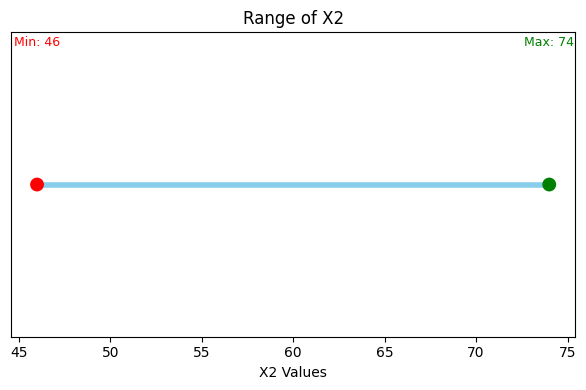

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("./data/Systolic1.csv")

# Define a function to interpret the range of the X2 column and plot it
def interpret_range(dataframe):
    min_val = dataframe['X2'].min()
    max_val = dataframe['X2'].max()
    range_val = max_val - min_val

    # Print interpretation first
    print(f"The range of X2 is {range_val}, calculated as the difference between the maximum value ({max_val}) and the minimum value ({min_val}). This indicates the spread of the data.")

    # Visualize the range using a simple line + points
    plt.figure(figsize=(6, 4))
    plt.hlines(y=1, xmin=min_val, xmax=max_val, color='skyblue', linewidth=4)
    plt.scatter([min_val, max_val], [1, 1], color=['red', 'green'], s=80, zorder=5)
    plt.text(min_val, 1.05, f"Min: {min_val}", ha='center', fontsize=9, color='red')
    plt.text(max_val, 1.05, f"Max: {max_val}", ha='center', fontsize=9, color='green')
    plt.title("Range of X2")
    plt.yticks([])
    plt.xlabel("X2 Values")
    plt.tight_layout()
    plt.show(block=True)  # ✅ Ensures the chart displays in non-notebook environments

# Call the function
interpret_range(df)

### 🧮 Variance: Mathematical Definition

The **variance** of a set of numbers is the average of the square of the deviations from the mean.

### Formula:

For a dataset with \( n \) values \( x_1, x_2, \ldots, x_n \), and mean \( \bar{x} \), the **sample variance** is defined as:

$$
s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Where:
- $s^2$ is the sample variance
- $x_i$ are the individual data points
- $\bar{x}$ is the sample mean
- $ n $ is the number of data points


#### ✅ Interpretation

Variance quantifies how much the data points in a sample or population differ from the mean.  
- A **higher variance** indicates more spread in the data
- A **lower variance** suggests the data points are closer to the mean.



The variance of X2 is 83.07. This value quantifies how much the X2 values deviate from their mean (62.45), indicating the spread of the data.


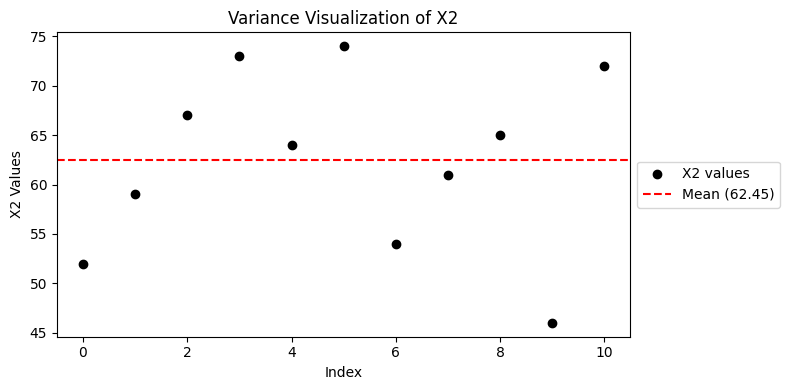

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("./data/Systolic1.csv")

# Define a function to interpret and visualize variance
def interpret_variance(dataframe):
    variance_val = dataframe['X2'].var()
    mean_val = dataframe['X2'].mean()

    print(f"The variance of X2 is {variance_val:.2f}. This value quantifies how much the X2 values deviate from their mean ({mean_val:.2f}), indicating the spread of the data.")

    # --- Visualization ---
    plt.figure(figsize=(8, 4))
    plt.scatter(range(len(dataframe['X2'])), dataframe['X2'], color='Black', label="X2 values")
    plt.axhline(mean_val, color='red', linestyle='--', label=f"Mean ({mean_val:.2f})")
    plt.title("Variance Visualization of X2")
    plt.xlabel("Index")
    plt.ylabel("X2 Values")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

    plt.show(block=True)

# Call the function
interpret_variance(df)


### 🧮 Standard Deviation: Mathematical Definition

The **standard deviation** is the square root of the variance.  
It measures how much the data values deviate from the mean on average.

For a dataset with $n$ values $x_1, x_2, \ldots, x_n$, and mean $\bar{x}$, the **sample standard deviation** is:

$$
s = \sqrt{ \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2 }
$$

Where:
- $s$ is the sample standard deviation
- $x_i$ are the individual data points
- $bar{x}$ is the sample mean
- $n$ is the number of data points

### 📌 Interpretation

It is another measure of the spread or dispersion of a set of data points. It quantifies the amount of variation or dispersion of a set of values. Like variance, it provides insight into how much the data deviates from the mean.

- A **low standard deviation** means the data points are close to the mean.
- A **high standard deviation** indicates the data is more spread out.
- It is widely used in statistics to understand variability and consistency.


Standard Deviation of X2: 9.11
This indicates how much the X2 values typically deviate from the mean (62.45). A larger value means greater spread.


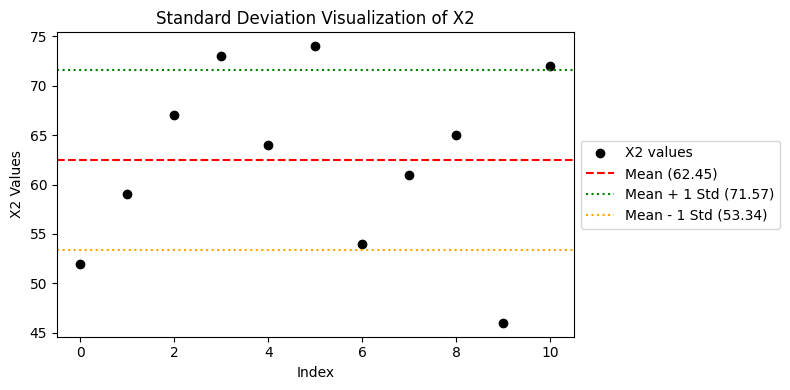

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("./data/Systolic1.csv")

# Compute standard deviation
std_dev_x2 = df['X2'].std()
mean_x2 = df['X2'].mean()

# Print interpretation
print(f"Standard Deviation of X2: {std_dev_x2:.2f}")
print(f"This indicates how much the X2 values typically deviate from the mean ({mean_x2:.2f}). A larger value means greater spread.")

# --- Visualization ---
plt.figure(figsize=(8, 4))
plt.scatter(range(len(df['X2'])), df['X2'], color='black', label='X2 values')
plt.axhline(mean_x2, color='red', linestyle='--', label=f'Mean ({mean_x2:.2f})')
plt.axhline(mean_x2 + std_dev_x2, color='green', linestyle=':', label=f'Mean + 1 Std ({mean_x2 + std_dev_x2:.2f})')
plt.axhline(mean_x2 - std_dev_x2, color='orange', linestyle=':', label=f'Mean - 1 Std ({mean_x2 - std_dev_x2:.2f})')
plt.title("Standard Deviation Visualization of X2")
plt.xlabel("Index")
plt.ylabel("X2 Values")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show(block=True)



### 🧮 Quartiles: Definitions

**Quartiles** divide a ranked dataset into four equal parts, each containing 25% of the data.

- **Q1 (First Quartile)**: 25% of the data falls below this value.
- **Q2 (Second Quartile / Median)**: 50% of the data falls below this value.
- **Q3 (Third Quartile)**: 75% of the data falls below this value.
- **IQR (Interquartile Range)**: Difference between Q3 and Q1.

$$
\text{IQR} = Q_3 - Q_1
$$


### 📌 Interpretation

- Quartiles help identify the **spread** and **skewness** of data.
- The **IQR** is useful for detecting **outliers** and understanding variability.



First Quartile (Q1): 56.5
Second Quartile (Median / Q2): 64.0
Third Quartile (Q3): 69.5
Interquartile Range (IQR): 13.0
The IQR of X2 is 13.0, showing the range of the middle 50% of the data. Values below Q1 or above Q3 are potential outliers.


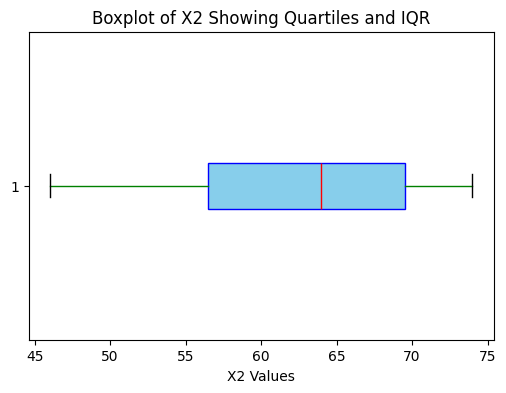

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("./data/Systolic1.csv")

# Compute quartiles and IQR for X2
q1 = df['X2'].quantile(0.25)
q2 = df['X2'].quantile(0.50)  # Median
q3 = df['X2'].quantile(0.75)
iqr = q3 - q1

# Print interpretation
print(f"First Quartile (Q1): {q1}")
print(f"Second Quartile (Median / Q2): {q2}")
print(f"Third Quartile (Q3): {q3}")
print(f"Interquartile Range (IQR): {iqr}")
print(f"The IQR of X2 is {iqr}, showing the range of the middle 50% of the data. "
      f"Values below Q1 or above Q3 are potential outliers.")

# --- Visualization with boxplot ---
plt.figure(figsize=(6, 4))
plt.boxplot(df['X2'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='black'))
plt.title("Boxplot of X2 Showing Quartiles and IQR")
plt.xlabel("X2 Values")
plt.show()


### 🧠 Challenge #6: Measures of Dispersion

Re-use the code you write for challenge 5, and using the data, calculate the **variance**, **standard deviation**, and **plot the Quartiles**. 

Write class `DispersionMeasures`, and add `interpret_variance`, `interpret_deviation` and `interpret_quartiles`, making them **attributes** of the new class.

You will continue to use the `Titanic data set`.

📌 **Instructions**:
- Define the class in the code cell below.
- Add a `constructor` and the three attributes to the class, each one with the proper parameters and return values.
- After the class, instantiate an object of class `DispersionMeasures` called `dispersion`
- Feed the data in the `df` data structure to the object, and have the code print and plot the variance, standard deviation, and quartiles.
- You have to decide what **features to use for the data analysis**.

#### 💻 Write the code in the cell below:

The variance of Age is 199.43, which indicates how spread out the data is.
The standard deviation of Age is 14.12, meaning values deviate on average about 14.12 units from the mean.
Quartile analysis for Age:
  Q1 (25th percentile): 20.25
  Q2 (Median / 50th percentile): 28.00
  Q3 (75th percentile): 38.00


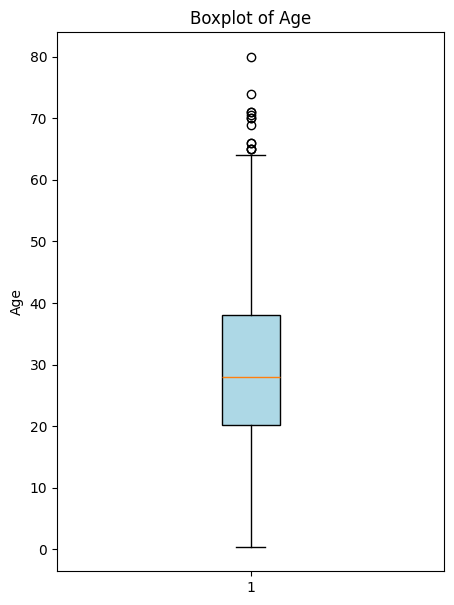

In [ ]:
## 📋 Measures of Dispersion calculator
 
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the dataset (already done in previous cells)
df = pd.read_csv("./data/titanic_data.csv")
 
# Define the DispersionMeasures class
class DispersionMeasures:
    def __init__(self, dataframe, column="Age"):
        self.df = dataframe
        self.column = column   # default column for analysis is 'Age'
 
    def interpret_variance(self):
        variance_val = self.df[self.column].var()
        return f"The variance of {self.column} is {variance_val:.2f}, which indicates how spread out the data is."
 
    def interpret_deviation(self):
        std_val = self.df[self.column].std()
        return f"The standard deviation of {self.column} is {std_val:.2f}, meaning values deviate on average about {std_val:.2f} units from the mean."
 
    def interpret_quartiles(self):
        q1 = self.df[self.column].quantile(0.25)
        q2 = self.df[self.column].quantile(0.50)  # median
        q3 = self.df[self.column].quantile(0.75)
 
        # Print interpretation
        print(f"Quartile analysis for {self.column}:")
        print(f"  Q1 (25th percentile): {q1:.2f}")
        print(f"  Q2 (Median / 50th percentile): {q2:.2f}")
        print(f"  Q3 (75th percentile): {q3:.2f}")
 
        # Plot quartiles with boxplot
        plt.figure(figsize=(5,7))
        plt.boxplot(self.df[self.column].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor="lightblue"))
        plt.title(f"Boxplot of {self.column}")
        plt.ylabel(self.column)
        plt.show()
 
# Instantiate the class
dispersion = DispersionMeasures(df, column="Age")
 
# Print and plot the results of variance, standard deviation, and quartiles
print(dispersion.interpret_variance())
print(dispersion.interpret_deviation())
dispersion.interpret_quartiles()

### 🧠 Challenge #7: Numerical Summary

Re-use the code you write for challenges 1-6, and using the data, produce a **Scatter Plot**, a 
**Histogram**, a **Box-whisker Plot**, and a **Venn Diagram**.
 
Write class `NumericalSummary`, and add `plot_scatter`, `plot_histogram` and `plot_whisker`, making them **attributes** of the new class.

Yo will continue to use the `Titanic data set`.

📌 **Instructions**:
- Define the class in the code cell below.
- Add a `constructor` and the three attributes to the class, each one with the proper parameters and return values.
- After the class, instantiate an object of class `NumericalSummary` called `summary`
- Feed the data in the `df` data structure to the object, and have the code print and plot the variance, standard deviation, and quartiles.
- You have to decide what **features to use for the data plots**.

#### 💻 Write the code in the cell below:

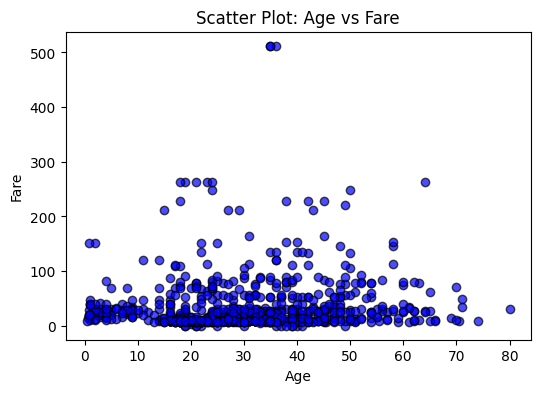

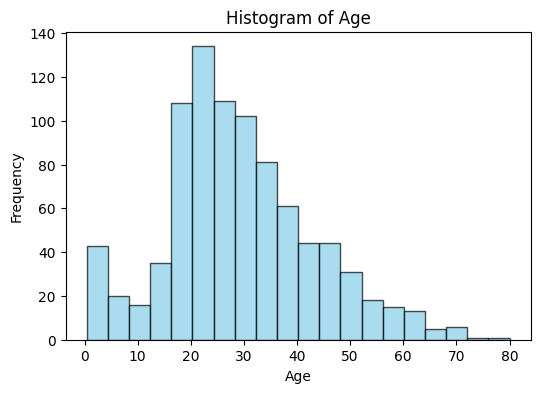

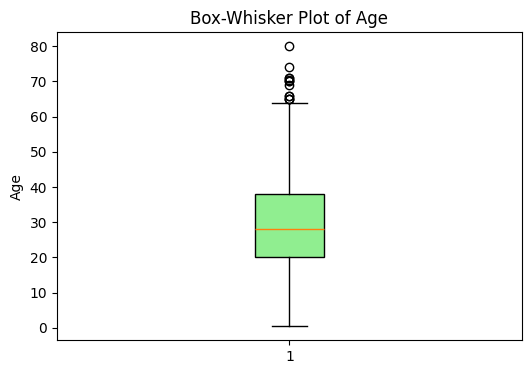

Summary Statistics for 'Age':
Variance: 199.43
Standard Deviation: 14.12
Quartiles:
0.25    20.25
0.50    28.00
0.75    38.00
Name: Age, dtype: float64

Summary Statistics for 'Fare':
Variance: 2478.25
Standard Deviation: 49.78
Quartiles:
0.25     7.9250
0.50    14.4542
0.75    31.1375
Name: Fare, dtype: float64



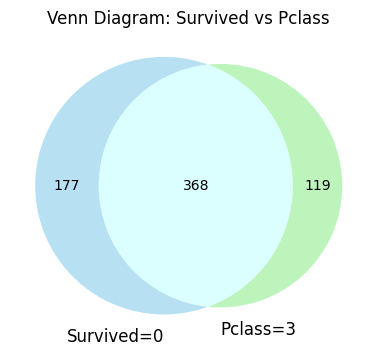

In [15]:
## 📋 Numerical Summary Notebook

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Load the Titanic dataset
df = pd.read_csv("./data/titanic_data.csv")


# ---------------- NumericalSummary Class ----------------
class NumericalSummary:
    def __init__(self, dataframe):
        self.df = dataframe

    # ----------- Numerical Plots -----------
    def plot_scatter(self, x_col, y_col):
        plt.figure(figsize=(6,4))
        plt.scatter(self.df[x_col], self.df[y_col], alpha=0.7, c="blue", edgecolor="k")
        plt.title(f"Scatter Plot: {x_col} vs {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()

    def plot_histogram(self, col, bins=20):
        plt.figure(figsize=(6,4))
        plt.hist(self.df[col].dropna(), bins=bins, color="skyblue", edgecolor="black", alpha=0.7)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

    def plot_whisker(self, col):
        plt.figure(figsize=(6,4))
        plt.boxplot(self.df[col].dropna(), patch_artist=True,
                    boxprops=dict(facecolor="lightgreen"))
        plt.title(f"Box-Whisker Plot of {col}")
        plt.ylabel(col)
        plt.show()

    # ----------- Summary Statistics -----------
    def summary_stats(self, col):
        variance = self.df[col].var()
        std_dev = self.df[col].std()
        quartiles = self.df[col].quantile([0.25, 0.5, 0.75])
        print(f"Summary Statistics for '{col}':")
        print(f"Variance: {variance:.2f}")
        print(f"Standard Deviation: {std_dev:.2f}")
        print(f"Quartiles:\n{quartiles}\n")

    # ----------- Categorical Venn Diagram -----------
    def plot_venn(self, col1, col2, val1=None, val2=None):
        
        #Create a Venn diagram comparing two categorical features.
        if val1 is None:
            val1 = self.df[col1].unique()[0]
        if val2 is None:
            val2 = self.df[col2].unique()[0]

        set1 = set(self.df[self.df[col1] == val1].index)
        set2 = set(self.df[self.df[col2] == val2].index)

        plt.figure(figsize=(6,4))
        venn2([set1, set2], set_labels=(f"{col1}={val1}", f"{col2}={val2}"),
              set_colors=("skyblue", "lightgreen"), alpha=0.6)
        plt.title(f"Venn Diagram: {col1} vs {col2}")
        plt.show()


# ---------------- Instantiate and Use ----------------
summary = NumericalSummary(df)

# Numerical Plots
summary.plot_scatter("Age", "Fare")
summary.plot_histogram("Age")
summary.plot_whisker("Age")

# Summary Statistics
summary.summary_stats("Age")
summary.summary_stats("Fare")

# Categorical Venn Diagrams
summary.plot_venn("Survived", "Pclass")  # default first category of each

### Scatter Plot
Shows relationship between passenger Age (x-axis) and Fare (y-axis). We can observe that most passengers paid lower fares, with a few outliers paying very high fares.
 
### Histogram
Displays Age distribution. Most passengers are between 20–40 years old, with fewer children and elderly passengers.
 
### Box-Whisker Plot
Highlights quartiles of Age. Median is around 28. Most passengers fall between 20 and 38 years old. Some outliers are much older.
 
### Venn Diagram
Compares Survivors vs First Class passengers. The overlap indicates 1st class passengers who survived.